<a href="https://colab.research.google.com/github/abhilashs1/Bike_Sharing_Demand/blob/main/Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [9]:
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from datetime import datetime     #importing for date time application
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
warnings.filterwarnings('ignore')


In [10]:
#MOUNTING DRIVE

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# LOAD SEOLBIKE DATA SET FROM DRIVE

bike_df = pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand/SeoulBikeData.csv',encoding='latin')

# **EXPLORATORY DATA ANALYSIS**

EDA is a unavoidable and one of the major step to fine-tune the given data set in different form of analysis to understand the insights. It is an approach to analyzing datasets to Summerize their main characteristics, Often with visual methods. 

**UNDERSTANDING MORE ABOUT THE DATA**

In [12]:
#top 5 Rows

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [13]:
#tail of the data

bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [14]:
#shape of the dataset with rows and columns
bike_df.shape

(8760, 14)

In [15]:
#description of data

bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [16]:
#columns name of the dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [17]:
print(bike_df['Seasons'].unique())
print(bike_df['Holiday'].unique())
print(bike_df['Functioning Day'].unique())
print(bike_df['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'


In [18]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [19]:
#unique values

bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [20]:
#checking the no null values
bike_df.isna().sum()
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Above result says that there are no null values in the data

In [21]:
bike_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool


---



**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour:** The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C)**: Temperature in Celsius, type : Float

**Humidity(%)**: Humidity in the air in %, type : int

**Wind speed (m/s) :** Speed of the wind in m/s, type : Float

**Visibility (10m):** Visibility in m, type : int

**Dew point temperature(°C)**: Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2)**: Sun contribution, type : Float

**Rainfall(mm)**: Amount of raining in mm, type : Float

**Snowfall (cm)**: Amount of snowing in cm, type : Float

**Seasons**: Season of the year, type : str, there are only 4 season's in data .

**Holiday:** If the day is holiday period or not, type: str

**Functioning Day:** If the day is a Functioning Day or not, type : str

# changing column names 

**some of the columns name in the dataset are too large and clumsy so we change that into some simple names**

In [22]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [23]:
bike_df=bike_df.rename(columns= { 'Rented Bike Count':'Rented_Bike_Count',
                    'Temperature(°C)':'Temperature',
                    'Humidity(%)':'Humidity',
                    'Wind speed (m/s)': 'Wind_speed',
                    'Visibility (10m)':'Visibility',
                    'Dew point temperature(°C)': 'Dew_point_temperature',
                    'Solar Radiation (MJ/m2)':'Solar_Radiation',
                    'Rainfall(mm)':'Rainfall',
                    'Snowfall (cm)':'Snowfall',
                    'Functioning Day':'Functioning_day'})

In [24]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

changing the date column into day, month ,year

In [25]:
bike_df['Date'] =bike_df['Date'].apply(lambda x:
                              dt.datetime.strptime(x,'%d/%m/%Y'))

In [26]:
# extracting the year and month from the date feature
bike_df['year'] = bike_df['Date'].dt.year
bike_df['month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [27]:
# creating a new column of'weekdays_weekend' 
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

In [28]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0



*  here the date column is changed to year month and day 

*   the dataset contains datas of 2017 december to 2018 novmber , so consider this is a one year , so just drop year column because 


*   also remove another column day ,because we dont need each day of every month ,we need data about weekday and weekend so we convert it into this foemat and drop day column


In [29]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [30]:
#converting 'hour','month''weekdays_weekend' columns into categorical data .

cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [31]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

# Checkingdistribution over dependent variable



Here we analyse our dependent variable ,A dependent variable is a variable whose value will change depending on the value of another variable.

our dependent variable is **Rented bike count**


**Now we analyse dependent variable with other columns by using some visualisation plots.**

**here we have categorical and numerical datas **


**so we have to analyse both datas with dependent variable** 


# **Exploring Categorical variables**


SEASONS

In [32]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_day', 'month',
       'weekdays_weekend'],
      dtype='object')

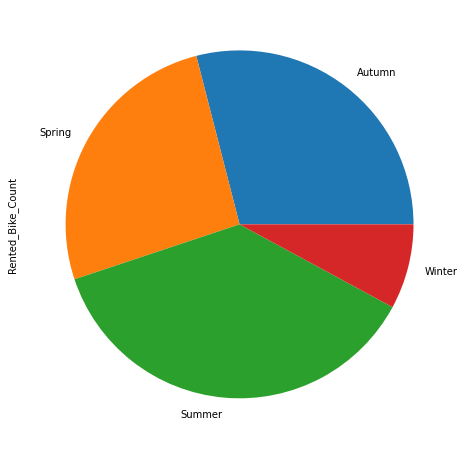

In [33]:
bike_df.groupby('Seasons')['Rented_Bike_Count'].sum().plot.pie(figsize=(15,8))

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

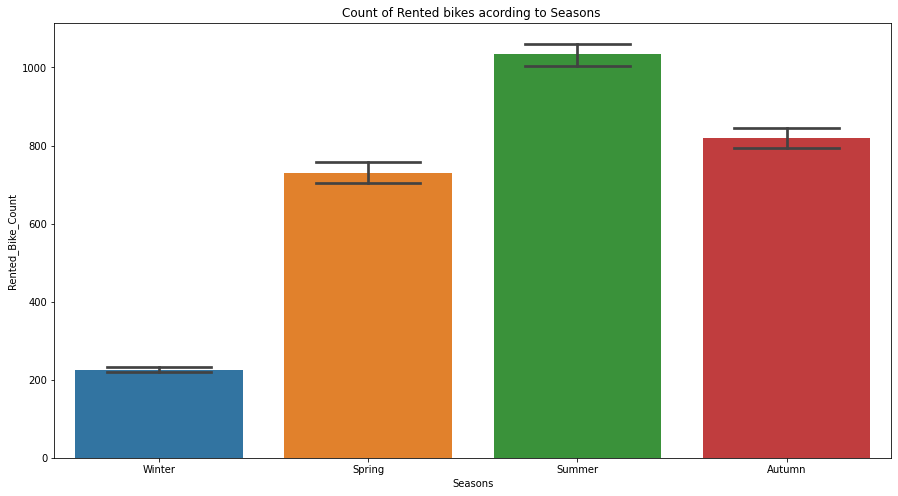

In [34]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize= .5)
ax.set(title='Count of Rented bikes acording to Seasons ')

From the  above barplot we can understand that usage of rented bike in those 4 seasons 


*   In summer season use of rented bike is very high 
*   In winter season the use of rented bike is very low  

**Month**

[Text(0.5, 1.0, 'Count of Rented bikes acording to month ')]

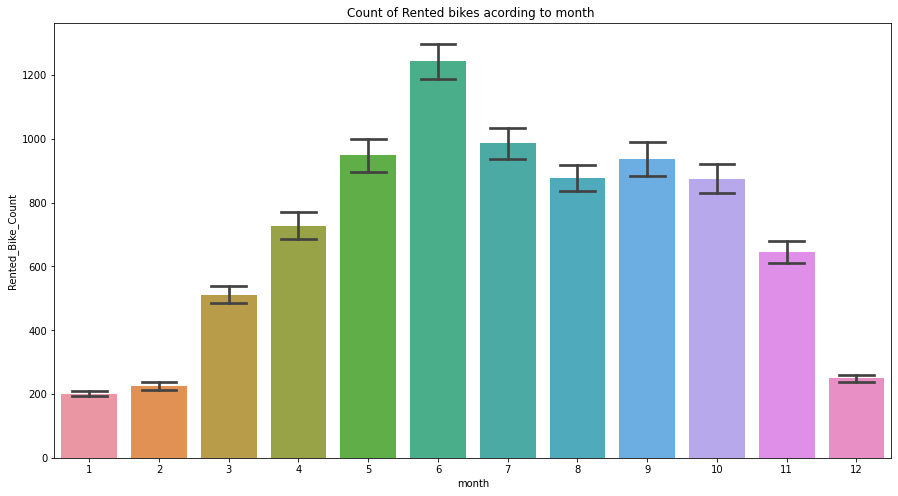

In [36]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize= .5)
ax.set(title='Count of Rented bikes acording to month ')

**From this month and bike count bar plot we can say that on june ,julu , auguest ,september , october , the use of rented bike is high as compared to other month** 

# Weekdays and weekend

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

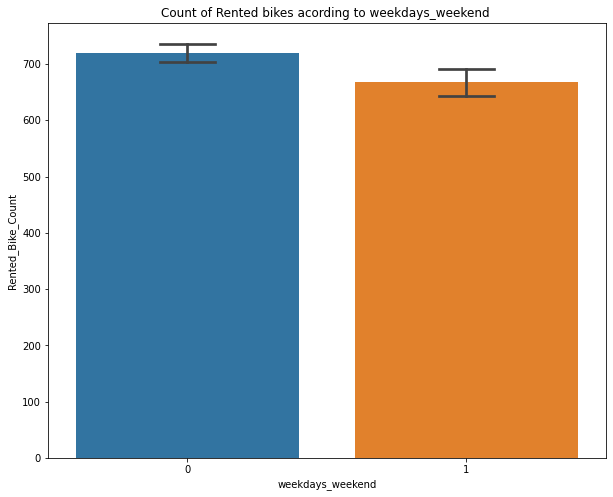

In [37]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize= .2)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

**From the above graph we observe that demand of bike is high in weekdays as compaired to weekend . it may because of the office . peoples using rented bike for reaching their office** .

# Hour

[Text(0.5, 1.0, 'Count of Rented bikes acording to hour ')]

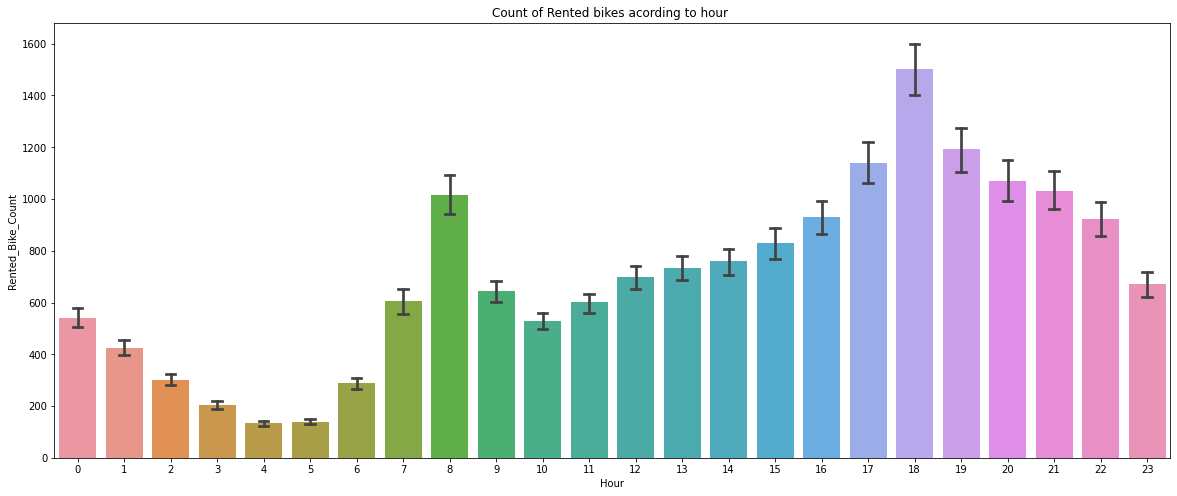

In [38]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize= .2)
ax.set(title='Count of Rented bikes acording to hour ')

### **In the above plot shows that the use of rented bike according to hours .**


**From this graph we observe thatpeople are using rented bike **between 6AM to 9AM  AND 5pm to 7PM ,that means they use bikes for reaching their office**

# Functioning day

[Text(0.5, 1.0, 'Count of Rented bikes acording to  Functioning Day')]

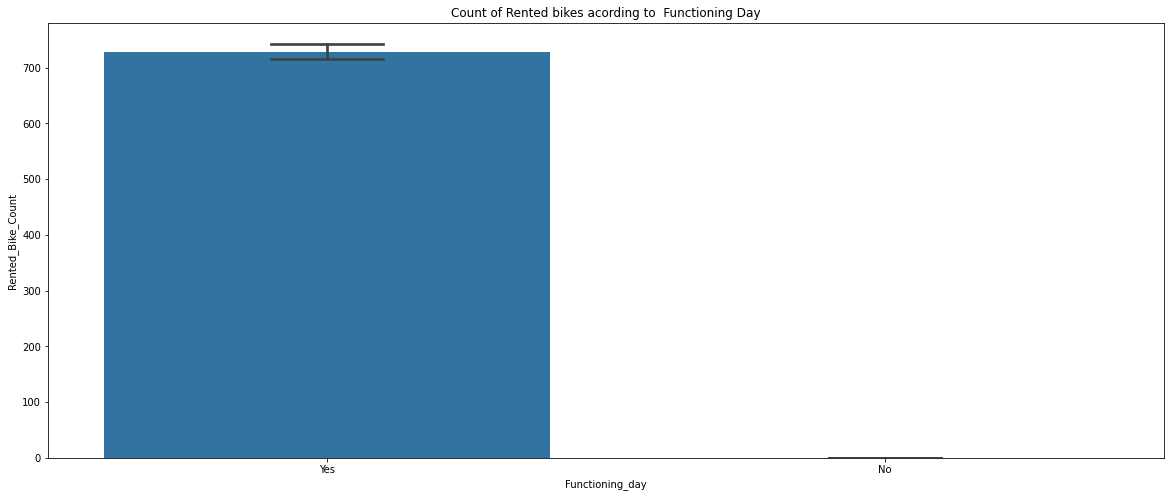

In [39]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x= 'Functioning_day',y='Rented_Bike_Count',ax=ax,capsize= .2)
ax.set(title='Count of Rented bikes acording to  Functioning Day')

**The above graph represent if the rented bike is using in  functiong day or not **
**Here we understand that people doesnot use bike in non functioning day**

# Holiday

[Text(0.5, 1.0, 'Count of Rented bikes acording to  holiday')]

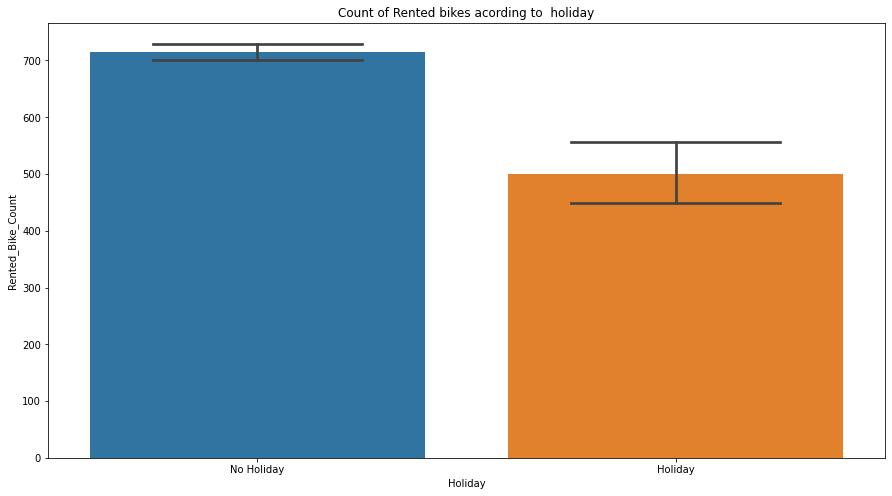

In [40]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df,x= 'Holiday',y='Rented_Bike_Count',ax=ax,capsize= .5)
ax.set(title='Count of Rented bikes acording to  holiday')

**This graph shows the use ofrented bike in holiday**

**We can undestand from the graph that in nonholidays people use rented bikemore ascompared to holidays**

# **Exploring Numerical Variables**

**Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.**

printing displots to analyze the distribution of all numerical features

In [41]:
numerical_columns = list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

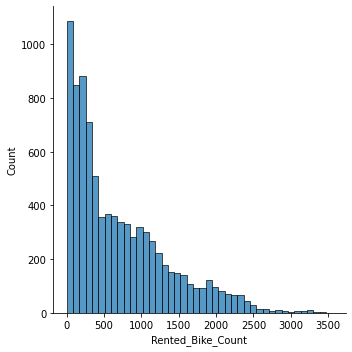

<Figure size 720x432 with 0 Axes>

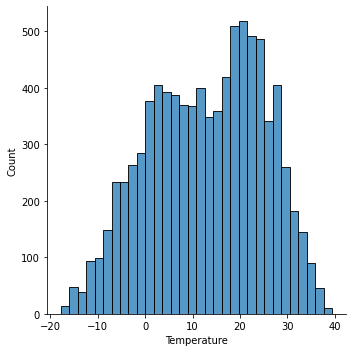

<Figure size 720x432 with 0 Axes>

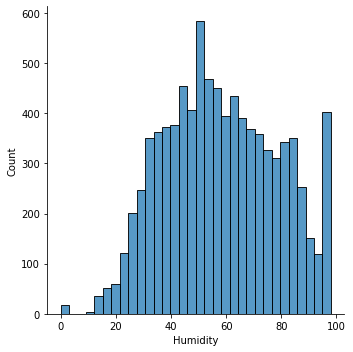

<Figure size 720x432 with 0 Axes>

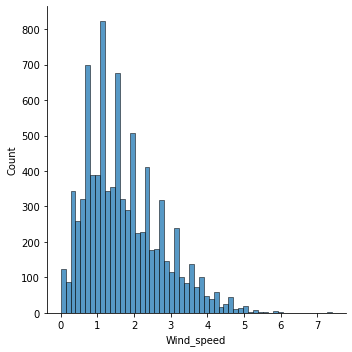

<Figure size 720x432 with 0 Axes>

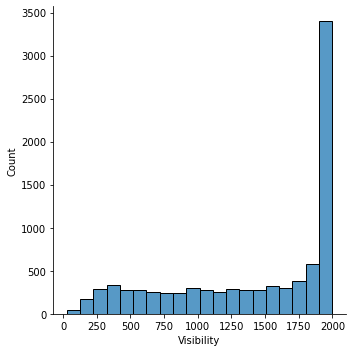

<Figure size 720x432 with 0 Axes>

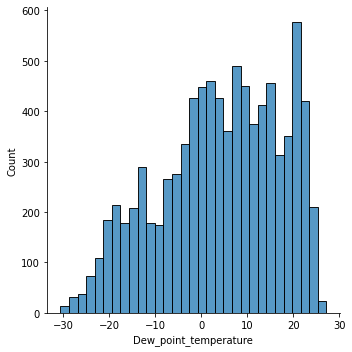

<Figure size 720x432 with 0 Axes>

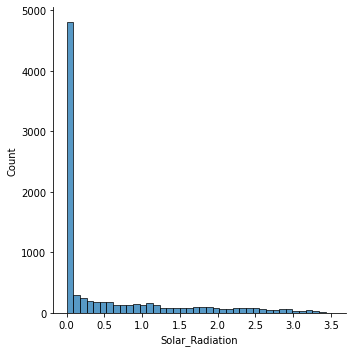

<Figure size 720x432 with 0 Axes>

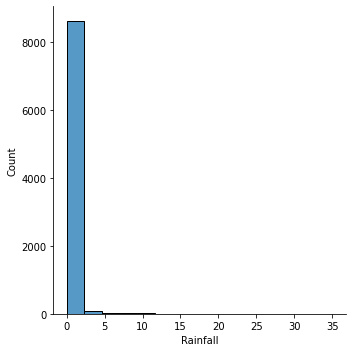

<Figure size 720x432 with 0 Axes>

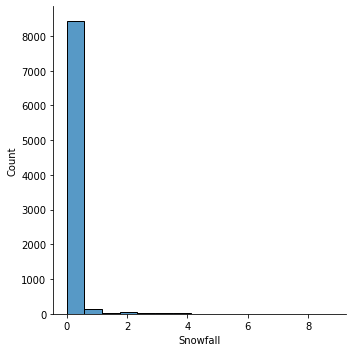

In [42]:
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.displot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

#print the plot to analyze the relationship between "Rented Bike Count"

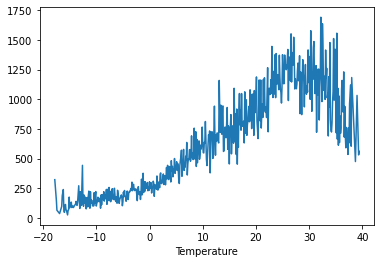

In [43]:
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

**From this plot we see that people like to ride bikes when **it is around  25°C **bold text**  

people are using less number of rented bike around-20°C 

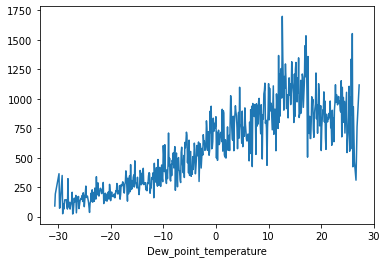

In [44]:
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

**This plot shows the similar result of temparature graph** 
**people use bike around the temparature  25°C**

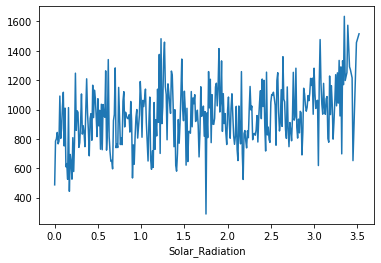

In [45]:
bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

**From this graph , shows that usageof rented bike is huge , its arounnd **1000, 

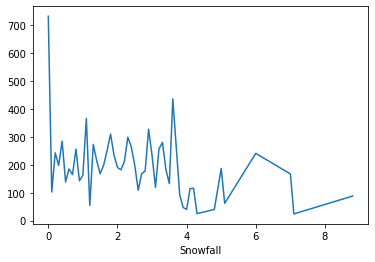

In [46]:
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

**From this above plot it shows that when the snowfall is more than 4cm the usage of rented bike is less**

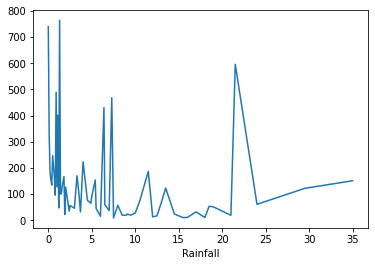

In [47]:
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

**From the above graph we can undersatnd that  bike renting **is not affected by rainfall , beacause demand of  rent ** *bikes is not decreasing when there is 20mmof rainfall.**

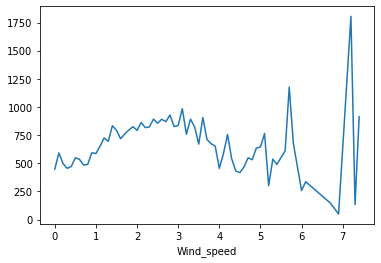

In [48]:
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

**Above plot shows that the demand of rented bike is uniformly distributed because when the speed of wind was 7 m/s then the demand of bike also increase.**